## Exploratory Data Analysis & Intro




#### Methodology
1. **Data Preparation**
- Renaming the columns
- Removing rows with `Unknown` values in `Income_Category` and `Education_Level` columns
- Converting `Years_on_book` to `Months_on_book`
- Converting object-type columns to categorical types

2. **Exploratory Data Analysis (EDA):**
- Attrition Rate
- Demographic Analysis
- Transaction Behavior
- Credit Limit Analysis



The dataset used for this project is adopted from Kaggle, containing 23 columns or variables:
| Column Name               | Description |
|---------------------------|-------------|
| `CLIENTNUM`               | Customer ID number|
| `Attrition_Flag`          | Customer Status (if the account is closed then 1 else 0)|
| `Customer_Age`            | Age |
| `Gender`                  | Gender (M=Male, F=Female) |
| `Dependent_count`         | Number of dependents the customer has (e.g. 0: single or self-sufficient; 4: Large family)|
| `Education_Level`         | Education background |
| `Marital_Status`          | Marital status (single, married, divorced or unknown) |
| `Income_Category`         | Annual income amount(< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)|
| `Card_Category`           | Type of credit card (Blue, Silver, Gold, Platinum) |
| `Months_on_book`          | Period of relationship with bank |
| `Total_Relationship_Count`| Total no. of products held by the customer|
| `Months_Inactive_12_mon`  | No. of months inactive in the last 12 months|
| `Contacts_Count_12_mon`   | No. of Contacts in the last 12 months|
| `Credit_Limit`            | Credit Limit on the Credit Card  |
| `Total_Revolving_Bal`     | Total Revolving Balance on the Credit Card|
| `Avg_Open_To_Buy`         | Open to Buy Credit Line (Average of last 12 months)|
| `Total_Amt_Chng_Q4_Q1`    | Change in Transaction Amount (Q4 over Q1) |
| `Total_Trans_Amt`         | Total Transaction Amount (Last 12 months)|
| `Total_Trans_Ct`          | Total Transaction Count (Last 12 months)|
| `Total_Ct_Chng_Q4_Q1`     | Change in Transaction Count (Q4 over Q1) |
| `Avg_Utilization_Ratio`   | Average Card Utilization Ratio |
| `NB_Prob_Active` | Probability of being a active customer (Naive Bayes)|
| `NB_Prob_Churned` | Probability of being a Attrited customer  (Naive Bayes)|


### Import Libraries and Data

In [261]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
# from datasets import load_dataset
import matplotlib.pyplot as plt  
import matplotlib.ticker as ticker


# Reading Data
df = pd.read_csv('/Users/yangchenqi/Desktop/credit_card_customer_project/BankChurners.csv')

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Data Cleanup

- Rename the column names
- Remove the 'Unknown' variables in 'Income_Category' and 'Education_Level' column
- Convert 'Months_on_book' to 'Years_on_book'
- Change columns of object type to categorical type 


In [262]:
# Rename the column names
df.rename(columns={
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'NB_Prob_Active',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'NB_Prob_Churned'
}, inplace=True)

# Filter out the 'Unknown' variables and convert 'Months_on_book'
df = df[df['Income_Category'] != 'Unknown'] 
df = df[df['Education_Level'] != 'Unknown'] 


df['Years_on_book'] = (df['Months_on_book'] / 12).round(1)

df_cleaned = df.drop('Months_on_book', axis=1)



# Change object type to categorical type
df_cleaned = df_cleaned.apply(lambda col: col.astype('category') if col.dtype == object else col)

df_cleaned.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB_Prob_Active,NB_Prob_Churned,Years_on_book
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,3.2
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,6,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,3.7
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,4,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,3.0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,3,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,2.8
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,5,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,1.8


### Attrition Flag to Explore

Create a pie chart for attrition rate of the credit card service.

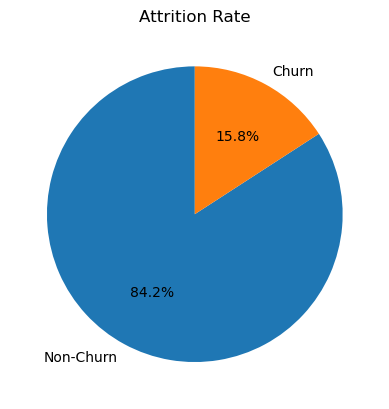

In [38]:
df_plot = df_cleaned['Attrition_Flag'].value_counts().plot(kind = 'pie', startangle = 90, autopct = '%1.1f%%',labels = ['Non-Churn', 'Churn'])
plt.title('Attrition Rate')
plt.ylabel('')
plt.show()


The proportion of the attrited customer is approximately 16%. From the scalemath article by Justin Arnold, if a churn rate exceed 7%, then it is a concerning siginal and warrants immediate attention. We can see that the bank is facing the challenge of high churn rate. Thus, it is worth to find the reasons for customer churn in banking through data analytics, including analyze customer behavior and identify potential churners.

https://scalemath.com/blog/what-is-a-good-monthly-churn-rate/

### Plot Demographical factors Counts
- Demographical factors include `Education_Level`, `Income_Category` and `Card_Category`. 

Filter Data for Attrited Customer

In [264]:
df_attrited = df_cleaned [df_cleaned ['Attrition_Flag'] == 'Attrited Customer']

df_attrited.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB_Prob_Active,NB_Prob_Churned,Years_on_book
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,2,...,0,1438.3,1.047,692,16,0.600,0.000,0.99616,0.003836,4.1
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,2,...,808,630.3,0.997,705,19,0.900,0.562,0.99028,0.009720,3.3
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,1,...,0,15769.0,1.041,602,15,0.364,0.000,0.99671,0.003294,3.0
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,2,...,0,34516.0,0.763,691,15,0.500,0.000,0.99823,0.001771,2.9
127,720201033,Attrited Customer,53,M,2,Graduate,Married,$80K - $120K,Blue,3,...,2227,9442.0,0.622,720,23,0.353,0.191,0.99447,0.005530,3.4


Create a stacked horizontal bar chart for three main demographical factors, displaying frequency of each demographical factor.

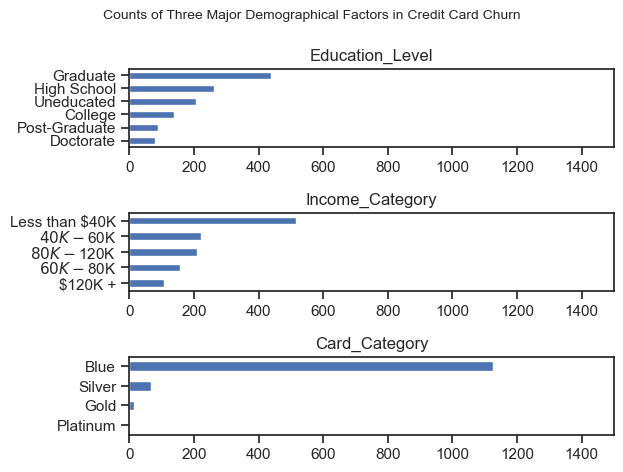

In [202]:
categorical_cols = ['Education_Level', 'Income_Category', 'Card_Category']

#Use subplots() function in matplotlib
fig, ax = plt.subplots(3,1)

#Use plot() function in pandas
#i: index of subplot
for i, demographical_factor in enumerate (categorical_cols):
    counts = df_attrited[demographical_factor].value_counts()
    counts.plot(kind='barh', ax=ax[i], title= demographical_factor)

    
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 1500) # make the scales the same

fig.suptitle('Counts of Three Major Demographical Factors in Credit Card Churn', fontsize =10)
fig.tight_layout()
plt.show()




Find out the numeric variables from the above plots. 

In [265]:
# The number of attrited customers
num_attrited_customers = df_attrited.shape[0]
print(num_attrited_customers)

# The proportion of attrited customer who had Doctorate degree
doct_prop = (df_attrited['Education_Level'] == 'Doctorate').sum()/ num_attrited_customers

print(doct_prop)

# The proportion of attrited customer who owned blue card and platinum card. 
blue_card = (df_attrited['Card_Category'] == 'Blue').sum()
blue_prop = blue_card/num_attrited_customers

platinum_card = (df_attrited['Card_Category'] == 'Platinum').sum()
platinum_prop = platinum_card/num_attrited_customers
print(platinum_card, platinum_prop)

1211
0.06523534269199009
3 0.002477291494632535


### Plot Transaction Behavior 

Creates distribution plots of `Total_Trans_Amt` and `Total_Trans_Ct` by using `for` loop. Also generates `if` statement sets axis limits based on the variable. 


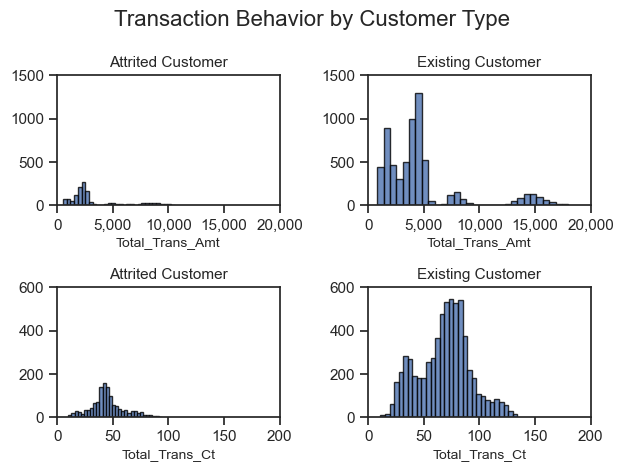

In [253]:
customer_type = ['Attrited Customer', 'Existing Customer']
transaction_list = ['Total_Trans_Amt', 'Total_Trans_Ct']

fig, ax = plt.subplots(2, 2)

for i, trans in enumerate(transaction_list):
    for j, cust in enumerate(customer_type):
        df_cleaned[df_cleaned['Attrition_Flag'] == cust][trans].plot(
        kind = 'hist', ax=ax[i,j], alpha=0.8, bins = 30, edgecolor='black')

        ax[i, j].set_title(f'{cust}', fontsize=11)
        ax[i, j].set_xlabel(trans, fontsize=10)
        ax[i, j].set_ylabel('')
        ax[i, j].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
        
        if trans == 'Total_Trans_Amt':
            ax[i, j].set_xlim(0, 20000)
            ax[i, j].set_ylim(0, 1500)

        else:
            ax[i, j].set_xlim(0, 200)
            ax[i, j].set_ylim(0, 600)

        

fig.suptitle('Transaction Behavior by Customer Type', fontsize=16)   
fig.tight_layout()
plt.show()
    


### Average Credit Limit vs. Income Category by Attrition Status 

##### **Pivot in Prep for Plotting**
Create a pivot table from `df_cleaned`, setting `Income_Category` as the index, `Credit_Limit` as the values and `Attrition_Flag` as the columns, and fills missing entries with zero. Select and reorder `Income_Category`.

In [267]:
df_credit_income = df_cleaned.pivot_table(
    values='Credit_Limit',
    index='Income_Category',
    columns='Attrition_Flag',
    aggfunc='mean',
    observed= False,
    fill_value=0
)

# Reorder the 'Income_Category' rows
df_credit_income = df_credit_income.loc[
    ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
]

df_credit_income

Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
Less than $40K,3596.462016,3818.179309
$40K - $60K,4977.007692,5454.231385
$60K - $80K,10336.403165,10839.626499
$80K - $120K,15782.939713,16127.697922
$120K +,19342.158879,19576.288400


Plot two line charts to show the relationship between income category and average credit limit, one for attrited customers and one for existing customers. 

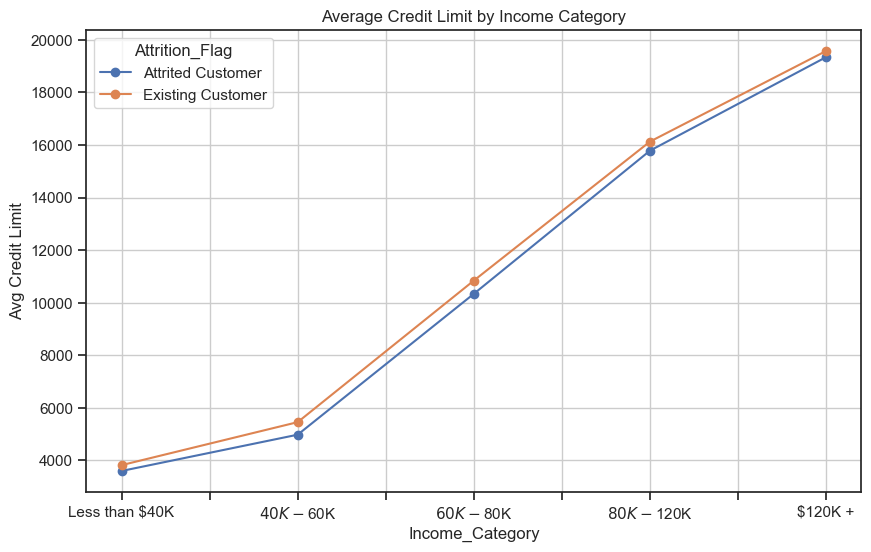

In [268]:
df_credit_income.plot(kind='line', marker='o', figsize=(10, 6), title='Average Credit Limit by Income Category')
plt.ylabel('Avg Credit Limit')
plt.grid(True)
plt.show()


### Average Credit Limit vs. Dependents Count by Attrition Status 

##### *Pivot in Prep for Plotting*
Create a pivot table from `df_cleaned`, setting `Dependent_count` as the index, `Credit_Limit` as the values and `Attrition_Flag` as the columns, and fills missing entries with zero. 

In [259]:
df_credit_dependent = df_cleaned.pivot_table(
    values='Credit_Limit',
    index='Dependent_count',
    columns='Attrition_Flag',
    aggfunc='mean',
    observed= False
)

df_credit_dependent

Attrition_Flag,Attrited Customer,Existing Customer
Dependent_count,,
0,7338.036449,6686.093202
1,7381.977273,7833.946356
2,8876.311003,8673.582468
3,8333.442135,9097.576087
4,8173.358639,9593.932827
5,8793.836000,9149.704198


#### *Plot Dependent Counts*
Plot two line charts to show the relationship between dependent count and average credit limit, one for attrited customers and one for existing customers. 

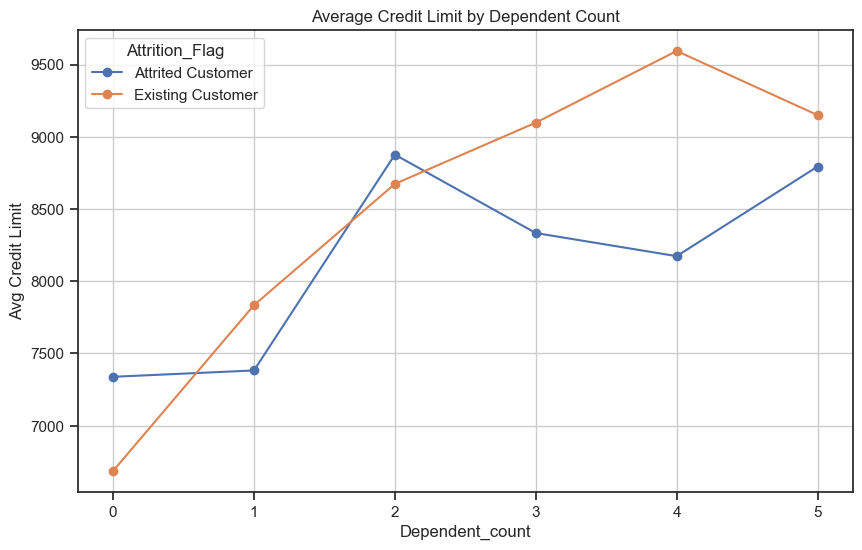

In [269]:
df_credit_dependent.plot(kind='line', marker='o', figsize=(10, 6), title='Average Credit Limit by Dependent Count')
plt.ylabel('Avg Credit Limit')
plt.grid(True)
plt.show()
